In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


(1797, 64)
0


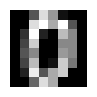

In [2]:
# 데이터 준비
from sklearn.datasets import load_digits

digits = load_digits()
X = digits['data']
y = digits['target']

print(X.shape)

print(y[0])
plt.figure(figsize=(1, 1))
# plt.imshow(X[0].reshape(1, 64), cmap="gray") # 이미지 표시
plt.imshow(X[0].reshape(8, 8), cmap="gray") # 이미지 표시
plt.axis("off")
plt.show()

In [3]:
# 3과 3이 아닌 숫자 분류 모델 만들기

yis3 = (y==3).astype(int)
np.unique(yis3, return_counts=True)

X_train, X_test, y_train, y_test = train_test_split(X, yis3, stratify=yis3, random_state=42)

LogisticRegression(max_iter=1000)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier # 무작위 예측 모델

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

dc = DummyClassifier(strategy="most_frequent")
dc.fit(X_train, y_train)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
# logreg.score(X_train, y_train), logreg.score(X_test, y_test)

test_predicted = logreg.predict(X_test) # 학습한 모델을 사용해서 예측
print( (test_predicted == y_test).sum() / len(y_test) ) # 정답의 갯수 / 전체 갯수 : 정확도 (accuracy)

dummy_predicted = dc.predict(X_test) # 모든 문제에 대해 0으로 예측 (찍기)
print( (dummy_predicted == y_test).sum() / len(y_test) )

tree_predicted = tree.predict(X_test)
print( (tree_predicted == y_test).sum() / len(y_test) )


0.98
0.8977777777777778
0.9688888888888889
